<a href="https://colab.research.google.com/github/MohamedHazem22594/heart_disease_analysis/blob/main/Assiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = t.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = t.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:01<00:00, 15.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.07MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.6MB/s]


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 128)
        self.final = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x

net = Net()

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001)

In [7]:
epochs = 10
train_losses = []
test_accuracies = []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    for data in train_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate after each epoch
    correct, total = 0, 0
    net.eval()
    with t.no_grad():
        for data in test_loader:
            x, y = data
            output = net(x)
            _, predicted = t.max(output, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    acc = 100 * correct / total
    test_accuracies.append(acc)

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {train_losses[-1]:.4f}, Test Accuracy: {acc:.2f}%")


Epoch [1/10] - Loss: 0.3010, Test Accuracy: 87.51%
Epoch [2/10] - Loss: 0.2787, Test Accuracy: 87.37%
Epoch [3/10] - Loss: 0.2645, Test Accuracy: 87.63%
Epoch [4/10] - Loss: 0.2523, Test Accuracy: 88.27%
Epoch [5/10] - Loss: 0.2377, Test Accuracy: 88.02%
Epoch [6/10] - Loss: 0.2261, Test Accuracy: 88.46%
Epoch [7/10] - Loss: 0.2175, Test Accuracy: 88.43%
Epoch [8/10] - Loss: 0.2069, Test Accuracy: 88.56%
Epoch [9/10] - Loss: 0.1964, Test Accuracy: 88.30%
Epoch [10/10] - Loss: 0.1916, Test Accuracy: 88.99%


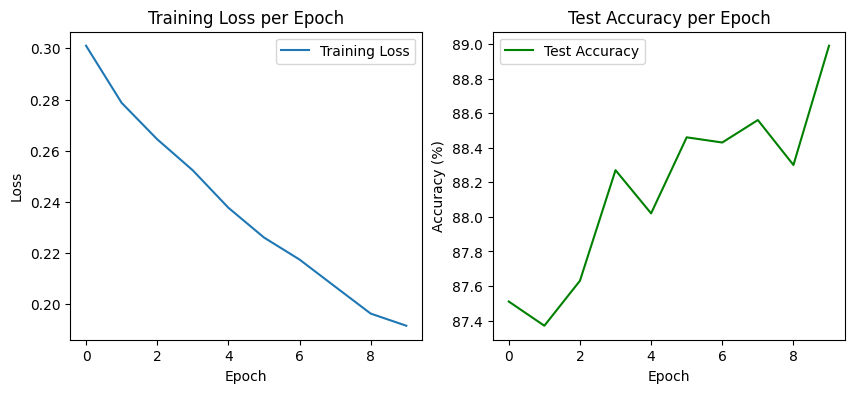

In [8]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_accuracies, label='Test Accuracy', color='green')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

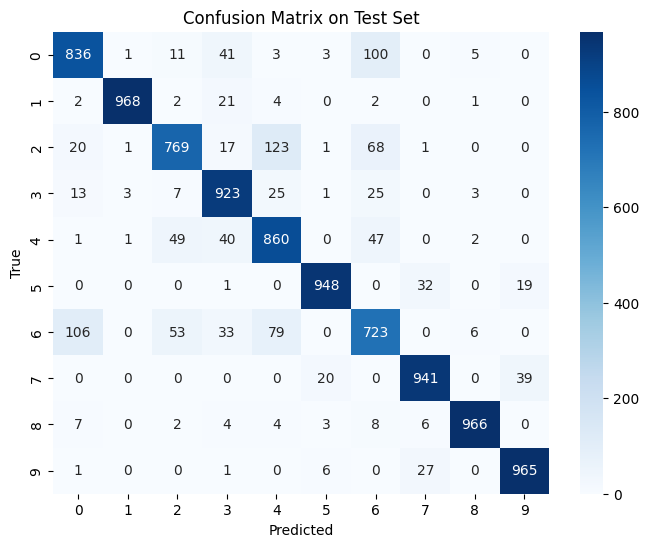

In [9]:
net.eval()
y_true, y_pred = [], []
with t.no_grad():
    for data in test_loader:
        x, y = data
        outputs = net(x)
        _, predicted = t.max(outputs, 1)
        y_true.extend(y.numpy())
        y_pred.extend(predicted.numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix on Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

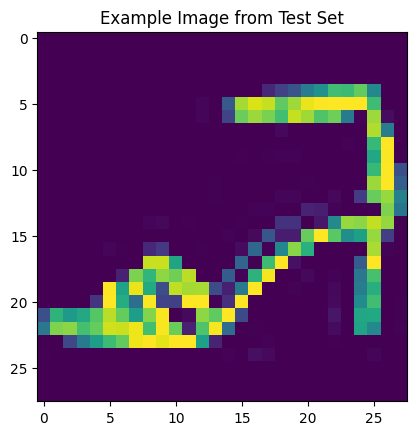

Predicted Label: 5
True Label: 5


In [10]:
plt.imshow(x[3].view(28, 28))
plt.title("Example Image from Test Set")
plt.show()

pred = t.argmax(net(x[3].view(-1, 784))[0])
print("Predicted Label:", pred.item())
print("True Label:", y[3].item())


In [11]:
print("\nConclusion:")
print(f"The model achieved a final test accuracy of approximately {test_accuracies[-1]:.2f}%.")
print("The neural network successfully classifies most Fashion-MNIST items correctly.")
print("Some confusion may occur between similar clothing types such as 'Shirt' and 'T-shirt/top'.")


Conclusion:
The model achieved a final test accuracy of approximately 88.99%.
The neural network successfully classifies most Fashion-MNIST items correctly.
Some confusion may occur between similar clothing types such as 'Shirt' and 'T-shirt/top'.
